In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from pylab import rcParams
import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
df = pd.read_csv('C:/Users/muska/Desktop/spotify_project/playlist.csv')
df.head()

,Unnamed: 0,id,spotify_id,list_name,list_id,song_id,song_name,artist,popularity,release_date,...,tempo,speechiness,acousticness,instrumentalness,danceability,duration_ms,loudness,valence,mode,key
0,0,1,3TiDHuwWaWeMCRmatZRC8H,My playlist,3TiDHuwWaWeMCRmatZRC8H,6hDM2uj57moJd3RLYTm5rI,"Leekan (From ""Ashke"" Soundtrack)",Amrinder Gill,47,2018-07-27,...,124.159,0.0506,0.788,0.000000,0.534,215605,-4.644,0.564,1,0
1,1,1,3TiDHuwWaWeMCRmatZRC8H,My playlist,3TiDHuwWaWeMCRmatZRC8H,1xNN6c8eW8Mm9uz9nVqln9,Isharon Isharon Men Dil Lenewale,Asha Bhosle,48,1964-01-01,...,137.156,0.0413,0.964,0.002130,0.439,290400,-7.341,0.560,1,5
2,2,1,3TiDHuwWaWeMCRmatZRC8H,My playlist,3TiDHuwWaWeMCRmatZRC8H,0xDdcB0gypop2DwJU2O1xG,Uden Jab Jab Zulfen Teri,Mohammed Rafi,44,1957-01-01,...,135.000,0.0970,0.479,0.000633,0.525,295926,-7.658,0.961,1,6
3,3,1,3TiDHuwWaWeMCRmatZRC8H,My playlist,3TiDHuwWaWeMCRmatZRC8H,5djTQgtCSdr7N2wOExvwc5,Wah Kya Nazare (feat. Gaby Fuego),Harnoor,44,2021-11-17,...,125.829,0.2400,0.127,0.000000,0.677,176019,-7.866,0.518,1,9
4,4,1,3TiDHuwWaWeMCRmatZRC8H,My playlist,3TiDHuwWaWeMCRmatZRC8H,1e7gkz5Yn8d9Wkxe58qdV5,Badra Bahaar,Amit Trivedi,40,2014-02-04,...,100.051,0.0296,0.179,0.001230,0.772,214132,-6.986,0.713,1,0


In [3]:
df.shape

(717, 22)

In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'spotify_id', 'list_name', 'list_id', 'song_id',
       'song_name', 'artist', 'popularity', 'release_date', 'energy',
       'liveness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness',
       'danceability', 'duration_ms', 'loudness', 'valence', 'mode', 'key'],
      dtype='object')

In [5]:
df.drop(columns=['Unnamed: 0', 'id', 'spotify_id', 'list_name','list_id','list_name'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           717 non-null    object 
 1   song_name         717 non-null    object 
 2   artist            717 non-null    object 
 3   popularity        717 non-null    int64  
 4   release_date      717 non-null    object 
 5   energy            717 non-null    float64
 6   liveness          717 non-null    float64
 7   tempo             717 non-null    float64
 8   speechiness       717 non-null    float64
 9   acousticness      717 non-null    float64
 10  instrumentalness  717 non-null    float64
 11  danceability      717 non-null    float64
 12  duration_ms       717 non-null    int64  
 13  loudness          717 non-null    float64
 14  valence           717 non-null    float64
 15  mode              717 non-null    int64  
 16  key               717 non-null    int64  
dt

In [7]:
df.isnull().sum()

song_id             0
song_name           0
artist              0
popularity          0
release_date        0
energy              0
liveness            0
tempo               0
speechiness         0
acousticness        0
instrumentalness    0
danceability        0
duration_ms         0
loudness            0
valence             0
mode                0
key                 0
dtype: int64

In [8]:
df.describe()

,popularity,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,duration_ms,loudness,valence,mode,key
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,56.298466,0.547782,0.146211,114.759745,0.065888,0.424851,0.019350,0.627240,235568.458856,-7.900969,0.472706,0.732218,5.011158
std,20.070968,0.190479,0.094274,28.398132,0.069107,0.307622,0.103986,0.142579,63526.394459,2.946597,0.209951,0.443113,3.550496
min,0.000000,0.056500,0.033000,60.048000,0.023200,0.000112,0.000000,0.224000,88373.000000,-24.557000,0.039300,0.000000,0.000000
25%,45.000000,0.416000,0.095000,92.977000,0.031600,0.124000,0.000000,0.526000,197468.000000,-9.535000,0.323000,0.000000,2.000000
50%,59.000000,0.539000,0.114000,110.101000,0.041900,0.401000,0.000003,0.649000,227143.000000,-7.589000,0.454000,1.000000,5.000000
75%,70.000000,0.700000,0.153000,131.972000,0.069400,0.715000,0.000164,0.732000,269351.000000,-5.790000,0.606000,1.000000,8.000000
max,100.000000,0.944000,0.731000,199.990000,0.889000,0.991000,0.960000,0.948000,616509.000000,-2.010000,0.962000,1.000000,11.000000


## EDA

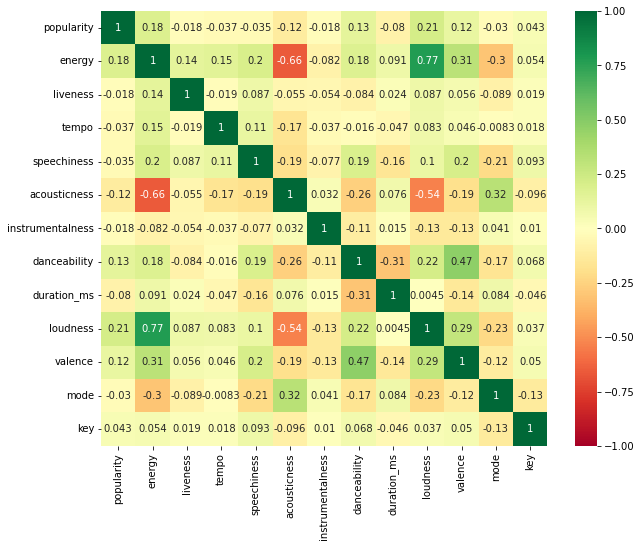

In [9]:
# Correlation heatmap
corr = df[["popularity","energy","liveness","tempo","speechiness","acousticness","instrumentalness","danceability","duration_ms","loudness","valence","mode","key"]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap="RdYlGn")
plt.show()

-- The song which is more loud has more energy.

-- More loudness , More danceability, More valence, More energy = More popular song

-- More the acousticness, less is the loudness and energy of the song.

In [10]:
df["release_date"]=pd.to_datetime(df["release_date"], format="%Y-%m-%d")

In [11]:
# My top favorite artists
top_artists=df['artist'].value_counts().to_frame().head(10)
top_artists.rename(columns={"artist":"Count"},inplace=True)
top_artists.style.background_gradient(cmap='RdBu_r')

,Count
Prateek Kuhad,34
Pritam,33
A.R. Rahman,20
Amit Trivedi,16
Ed Sheeran,14
AP Dhillon,13
Arko,13
The Local Train,13
One Direction,12
Shawn Mendes,11


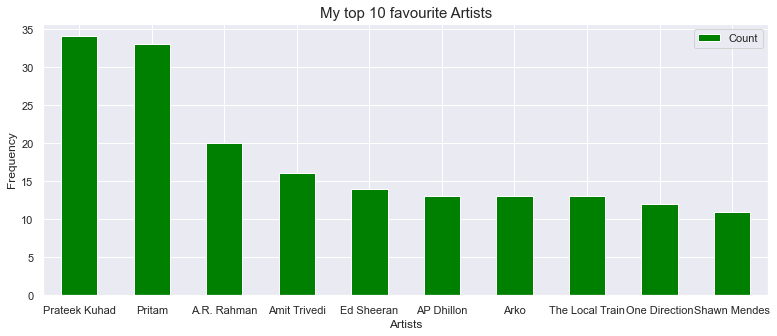

In [12]:
sns.set(style="darkgrid")
top_artists.plot(kind="bar",figsize=(13,5), color="green")
plt.title('My top 10 favourite Artists',fontsize=15)
plt.xlabel('Artists',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(rotation=0)
plt.show()

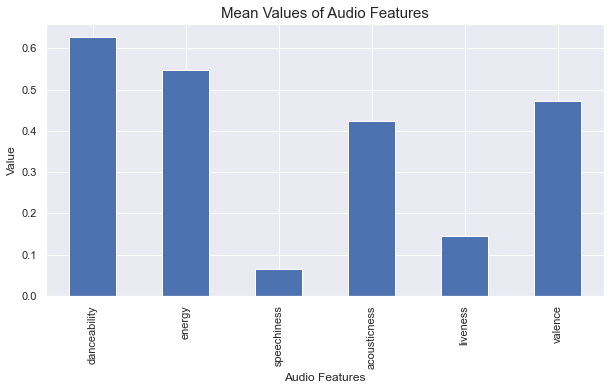

In [13]:
sns.set(style="darkgrid")
audio = df[['danceability','energy','speechiness','acousticness','liveness','valence']]
plt.figure(figsize=(10,5))
audio.mean().plot.bar()
plt.title('Mean Values of Audio Features',fontsize=15)
plt.xlabel('Audio Features',fontsize=12)
plt.ylabel('Value',fontsize=12)
plt.show()

In [14]:
df["duration_in_mins"]=df["duration_ms"]/60000

In [15]:
# Duration of top songs
duration=df.loc[:, ['song_name','duration_in_mins']].sort_values(by='duration_in_mins',ascending=False).head(20)
duration.reset_index(drop=True,inplace=True)
duration.style.background_gradient(cmap='RdBu_r')

,song_name,duration_in_mins
0,Tajdar-E-Haram Coke Studio Season 8,10.275150
1,Kamli,8.713083
2,Apsraa,8.273683
3,Latthay Di Chaadar,7.980133
4,Patang,7.916667
5,Kun Faya Kun,7.841667
6,Uddi Ja (Coke Studio Season 9),7.033333
7,Rehna Tu,6.821250
8,Chaap Tilak,6.733367
9,Ikko - Mikke,6.638883


In [16]:
# Most popular songs
popular=df.loc[:, ['song_name','popularity']].sort_values(by='popularity',ascending=False).head(20)
popular.reset_index(drop=True,inplace=True)
popular.style.background_gradient(cmap='RdBu_r')

,song_name,popularity
0,Me Porto Bonito,100
1,"Quevedo: Bzrp Music Sessions, Vol. 52",99
2,Moscow Mule,96
3,PROVENZA,95
4,As It Was,94
5,Until I Found You,91
6,Blinding Lights,91
7,Dandelions,90
8,Bad Habits,90
9,La Bachata,90


In [17]:
df['release_year']=df['release_date'].dt.year
release=df.groupby('release_year')['song_name'].count().to_frame()
release.rename(columns={'song_name':'count'},inplace=True)

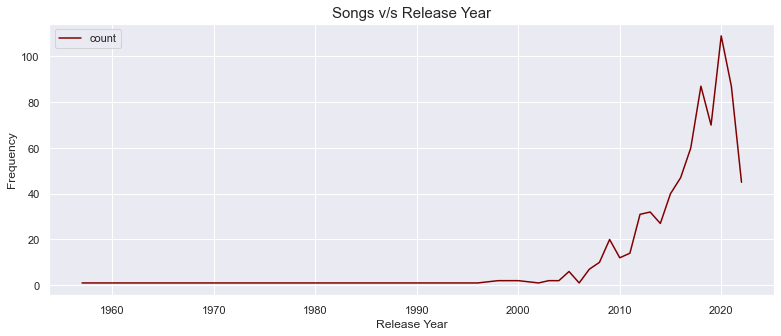

In [18]:
sns.set(style="darkgrid")
release.plot(kind="line",figsize=(13,5), color="maroon")
plt.title('Songs v/s Release Year',fontsize=15)
plt.xlabel('Release Year',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [19]:
df1=df.loc[df.release_year>2000]

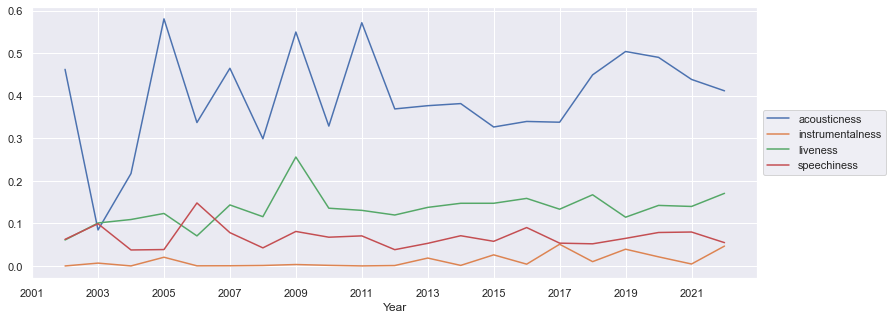

In [20]:
# Acousticness vs instrumentalness vs liveness vs speechiness of songs over time
temp = df1[['release_year','acousticness','instrumentalness','liveness','speechiness']].groupby(by='release_year').mean()
temp.plot.line(figsize=(13,5))
plt.xlabel('Year')
plt.xticks(np.arange(2001,2022,2))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [21]:
X = pd.DataFrame(df.iloc[:, [3,5,6,7,8,9,10,11,12,13,14,15,16]].values)
cols = df.iloc[:, [3,5,6,7,8,9,10,11,12,13,14,15,16]].columns

In [22]:
X.columns = cols
X

,popularity,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,duration_ms,loudness,valence,mode,key
0,47.0,0.666,0.1940,124.159,0.0506,0.788,0.000000,0.534,215605.0,-4.644,0.564,1.0,0.0
1,48.0,0.447,0.1360,137.156,0.0413,0.964,0.002130,0.439,290400.0,-7.341,0.560,1.0,5.0
2,44.0,0.715,0.2250,135.000,0.0970,0.479,0.000633,0.525,295926.0,-7.658,0.961,1.0,6.0
3,44.0,0.468,0.1220,125.829,0.2400,0.127,0.000000,0.677,176019.0,-7.866,0.518,1.0,9.0
4,40.0,0.724,0.0888,100.051,0.0296,0.179,0.001230,0.772,214132.0,-6.986,0.713,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,45.0,0.903,0.0641,129.967,0.3070,0.155,0.000050,0.536,290493.0,-5.501,0.657,0.0,1.0
713,87.0,0.574,0.1000,94.009,0.0278,0.572,0.000000,0.577,268165.0,-6.525,0.436,1.0,0.0
714,74.0,0.736,0.1280,85.035,0.0658,0.643,0.000000,0.572,238252.0,-7.768,0.778,1.0,11.0
715,63.0,0.769,0.1590,158.953,0.0464,0.105,0.256000,0.687,149434.0,-5.604,0.413,0.0,11.0


### Standardizing the data

In [23]:
standardScaler = StandardScaler()
X = standardScaler.fit_transform(X)

### Finding out the proper number of clusters using Elbow method

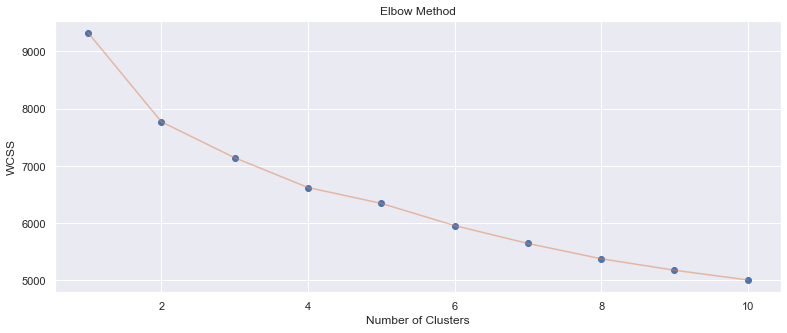

In [24]:
plt.figure(figsize=(13,5))
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, 'o')
plt.plot(range(1 ,11) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Using Silhouette score

For n_clusters = 2 The average silhouette_score is : 0.16498797116351396
For n_clusters = 3 The average silhouette_score is : 0.12614159604273664
For n_clusters = 4 The average silhouette_score is : 0.14086867207282427
For n_clusters = 5 The average silhouette_score is : 0.09128805833468458
For n_clusters = 6 The average silhouette_score is : 0.11127618179866386
For n_clusters = 7 The average silhouette_score is : 0.11492743489898323
For n_clusters = 8 The average silhouette_score is : 0.11244086575837652
For n_clusters = 9 The average silhouette_score is : 0.11856106790731219
For n_clusters = 10 The average silhouette_score is : 0.11554529235132148


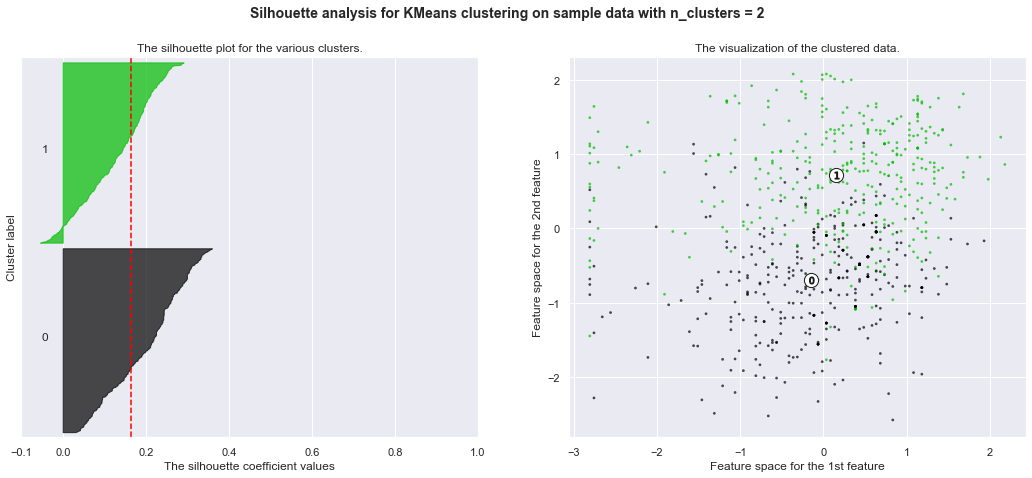

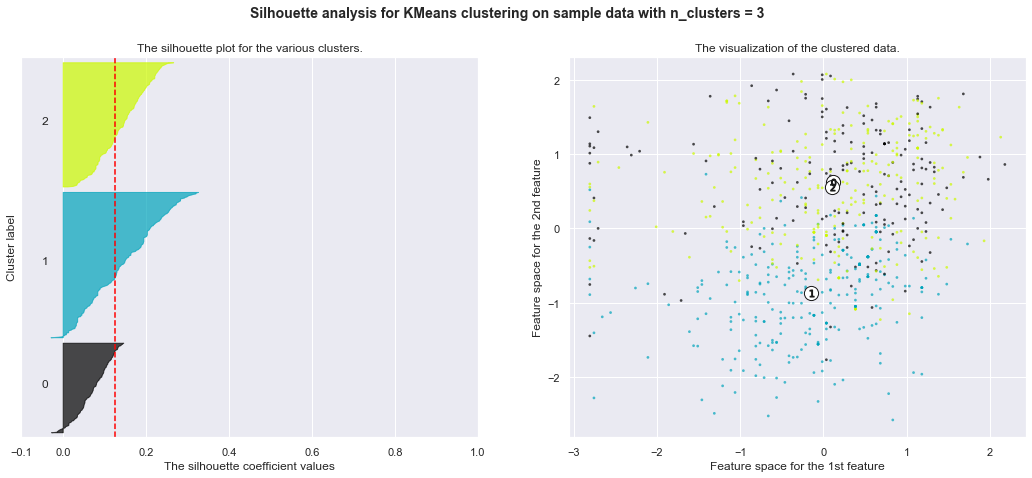

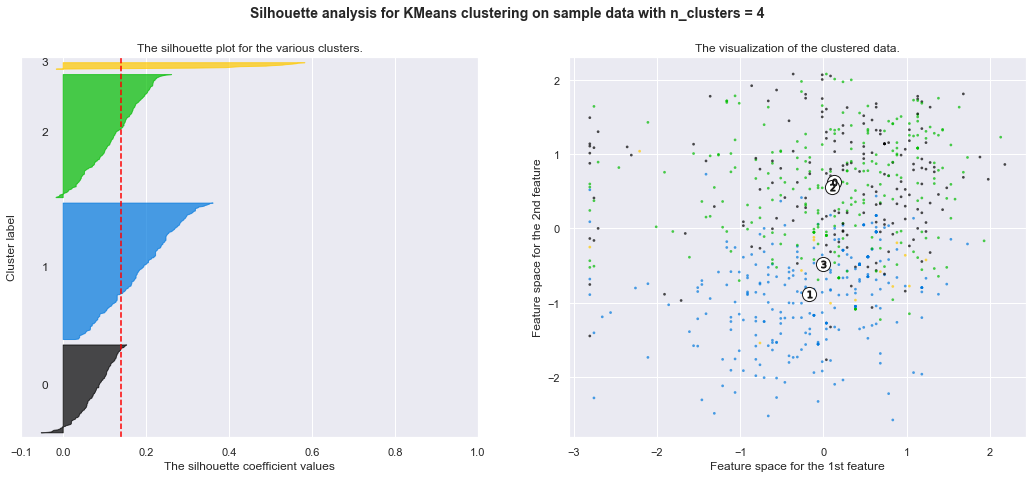

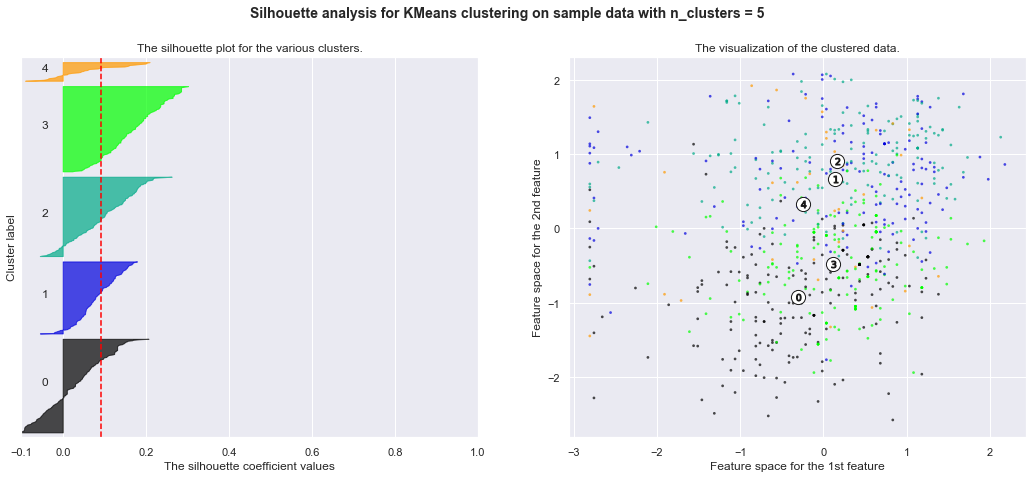

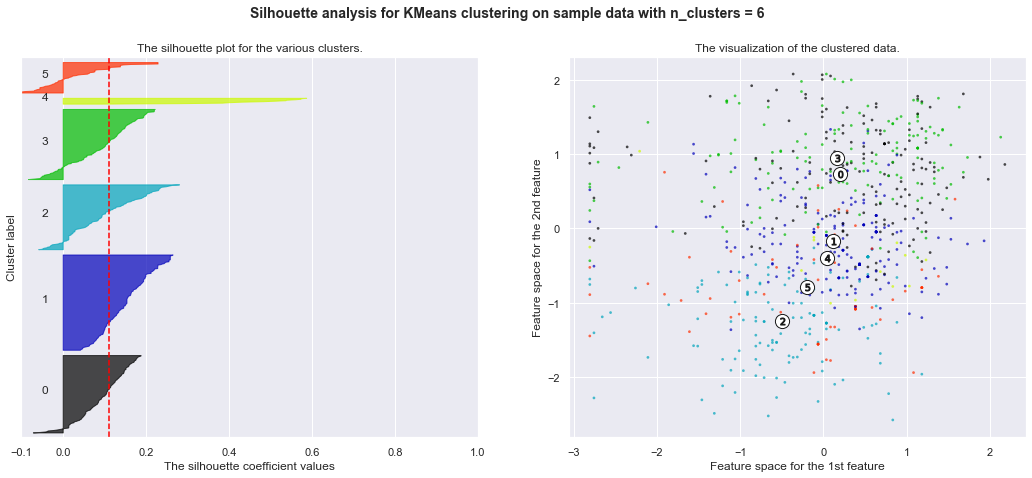

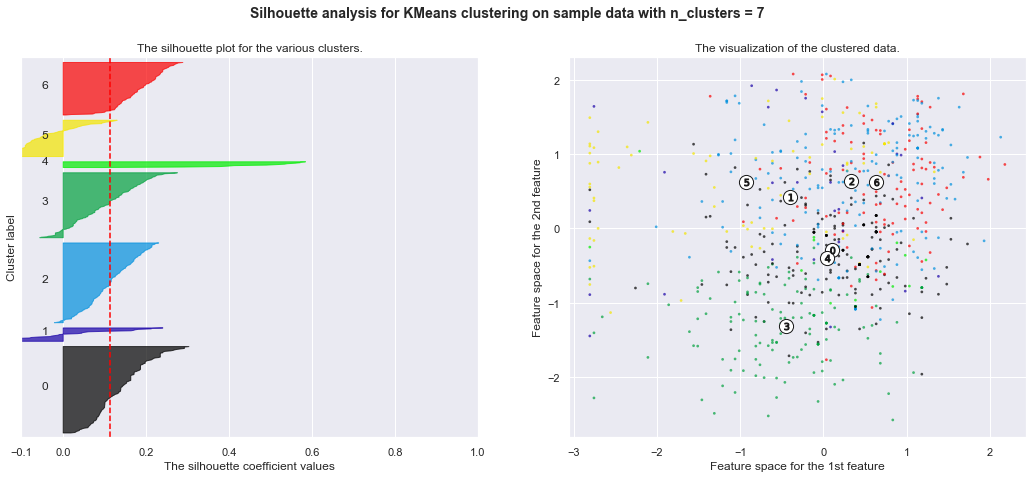

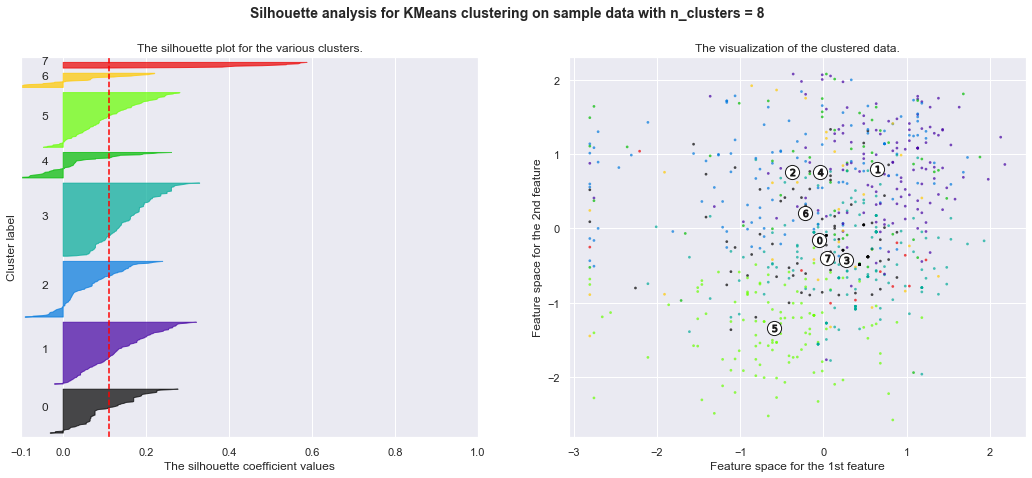

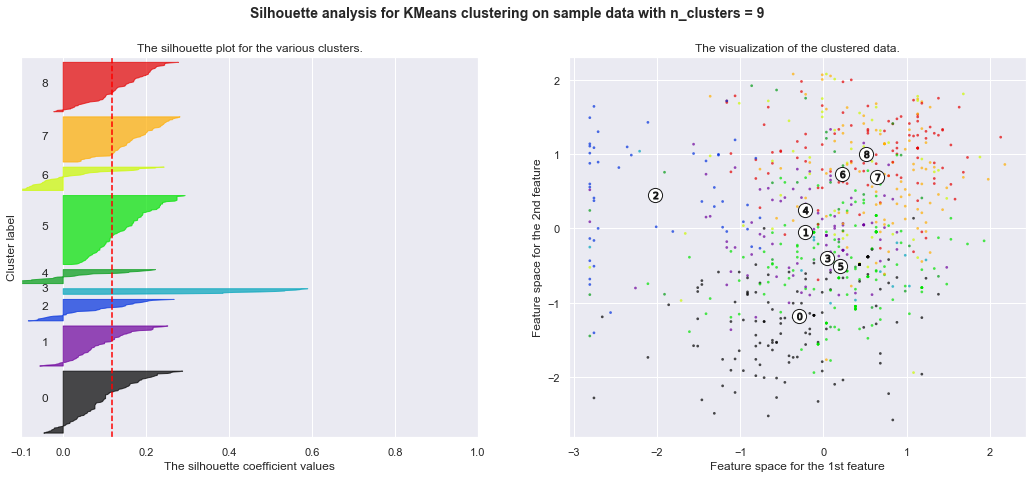

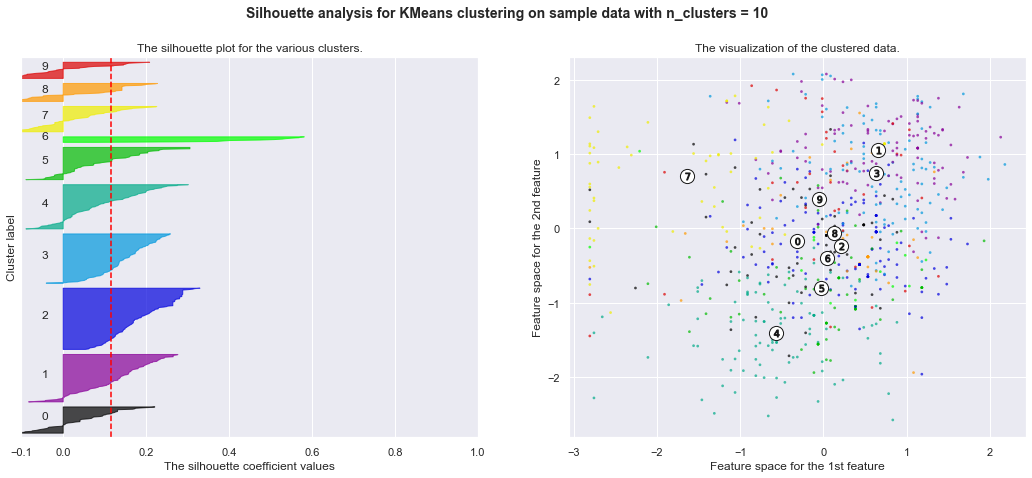

In [25]:
for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Training and Predicting

In [26]:
kmeans_model = KMeans(n_clusters=4, random_state=3).fit(X) #taking clusters as 4
preds = kmeans_model.predict(X)

In [27]:
preds

array([1, 3, 1, 1, 1, 2, 3, 0, 0, 3, 3, 0, 3, 2, 3, 2, 1, 2, 3, 1, 0, 1,
       2, 0, 1, 3, 1, 2, 3, 0, 2, 1, 0, 1, 0, 2, 1, 0, 2, 0, 2, 2, 1, 2,
       1, 1, 1, 3, 3, 2, 3, 3, 0, 0, 3, 2, 2, 2, 2, 0, 2, 0, 3, 3, 0, 0,
       1, 2, 1, 1, 3, 0, 1, 2, 3, 0, 3, 3, 3, 3, 1, 3, 2, 3, 0, 0, 3, 2,
       1, 1, 0, 2, 2, 0, 1, 2, 3, 0, 2, 2, 1, 1, 1, 0, 3, 2, 1, 3, 3, 2,
       2, 3, 1, 2, 2, 1, 1, 1, 1, 3, 2, 3, 3, 3, 3, 1, 3, 3, 0, 3, 1, 0,
       0, 1, 2, 0, 1, 1, 3, 1, 1, 2, 3, 3, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 3, 2, 0, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 1,
       1, 1, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1,
       2, 3, 1, 0, 0, 0, 3, 3, 0, 1, 3, 1, 0, 0, 3, 0, 3, 3, 3, 3, 3, 2,
       0, 0, 3, 0, 3, 3, 2, 3, 0, 3, 3, 0, 0, 1, 2, 2, 3, 1, 1, 2, 0, 3,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 1, 1, 3, 3, 1, 1, 0,
       3, 0, 3, 3, 3, 0, 3, 3, 1, 2, 3, 3, 1, 0, 3, 1, 1, 2, 1, 1, 2, 1,
       1, 3, 3, 2, 2, 2, 2, 1, 2, 2, 0, 1, 1, 2, 2,

In [28]:
df['clusters'] = pd.DataFrame(data=preds, dtype=int)

In [29]:
# popularity mean by cluster
df.groupby(['clusters']).popularity.mean().sort_values(ascending=False)

clusters
0    59.795181
2    58.463277
1    57.401099
3    50.234375
Name: popularity, dtype: float64

In [30]:
# checking number of songs in each cluster
df['clusters'].value_counts()

3    192
1    182
2    177
0    166
Name: clusters, dtype: int64

In [31]:
# checking the songs in the cluster
df.loc[df['clusters'] == 2][:10]

,song_id,song_name,artist,popularity,release_date,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,duration_ms,loudness,valence,mode,key,duration_in_mins,release_year,clusters
5,29m79w9xPMH4YCD6r8JSmV,Excuses,AP Dhillon,82,2020-07-24,0.717,0.1490,94.984,0.0822,0.0842,0.000000,0.837,176233,-7.749,0.4940,0,5,2.937217,2020,2
13,1bU2NTQlRFtKB5PYF9v9Xv,Breathless - Album - Breathless 98,Shankar Mahadevan,56,1998-12-31,0.881,0.3170,99.858,0.1950,0.4460,0.000000,0.793,185720,-5.589,0.0393,0,1,3.095333,1998,2
15,3UhmuWcFaLS3AO3kI9ynQ2,Insane,AP Dhillon,76,2021-04-16,0.572,0.0975,98.967,0.0545,0.4160,0.000025,0.796,206061,-7.030,0.3040,0,8,3.434350,2021,2
17,48porPFwZ8TtUSXjtoh4dU,Kattey,Ram Sampath,29,2013-08-24,0.887,0.0618,92.004,0.1130,0.0868,0.000000,0.653,295360,-2.237,0.7600,0,11,4.922667,2013,2
22,5gSVKG0R4xc8qtDIoyDNy8,Saada Pyaar,AP Dhillon,68,2020-12-23,0.655,0.1180,91.004,0.0866,0.0391,0.000000,0.743,213626,-5.228,0.1640,0,7,3.560433,2020,2
27,7lvDsmTRXFE3dK4OjvRiWB,Pasoori,Shae Gill,85,2022-02-06,0.596,0.0625,91.991,0.0430,0.0657,0.000000,0.714,224147,-6.206,0.6690,0,11,3.735783,2022,2
30,5mnvugwfFYnJm9zuyGkgqF,"Ghalat Fehmi - From ""Superstar""",Asim Azhar,66,2019-07-25,0.588,0.1890,134.014,0.0910,0.6080,0.000093,0.758,286008,-7.777,0.7960,0,11,4.766800,2019,2
35,17ElchRiDVSnGyeiLIzZne,Bacha,Prabh Gill,44,2016-11-03,0.721,0.3510,90.053,0.0372,0.7610,0.000000,0.667,242667,-2.396,0.7040,0,10,4.044450,2016,2
38,0ydyIEJ02X3kcZ6Bop6sHO,Sohne Lagde,Sidhu Moose Wala,63,2019-07-15,0.716,0.1090,84.384,0.1450,0.3540,0.000000,0.589,209453,-5.651,0.3270,0,2,3.490883,2019,2
40,7qLwVPPFQPWkct7mcimGGs,Jaan Deyan Ge,Ammy Virk,44,2020-01-20,0.547,0.2800,86.497,0.0300,0.7790,0.000000,0.552,228522,-4.899,0.6250,0,5,3.808700,2020,2


In [32]:
## Dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
pca = pd.DataFrame(principal_components)
pca.columns = ['x', 'y']

In [33]:
pca['clusters']=df['clusters']
pca

,x,y,clusters
0,0.068756,-0.616874,1
1,1.486918,-0.688550,3
2,-0.836897,-0.487845,1
3,-0.935375,1.467766,1
4,-0.990993,0.400332,1
...,...,...,...
712,-2.684851,-0.663686,2
713,0.424251,-0.679731,0
714,-0.542700,0.361946,0
715,-2.053458,-0.146999,2


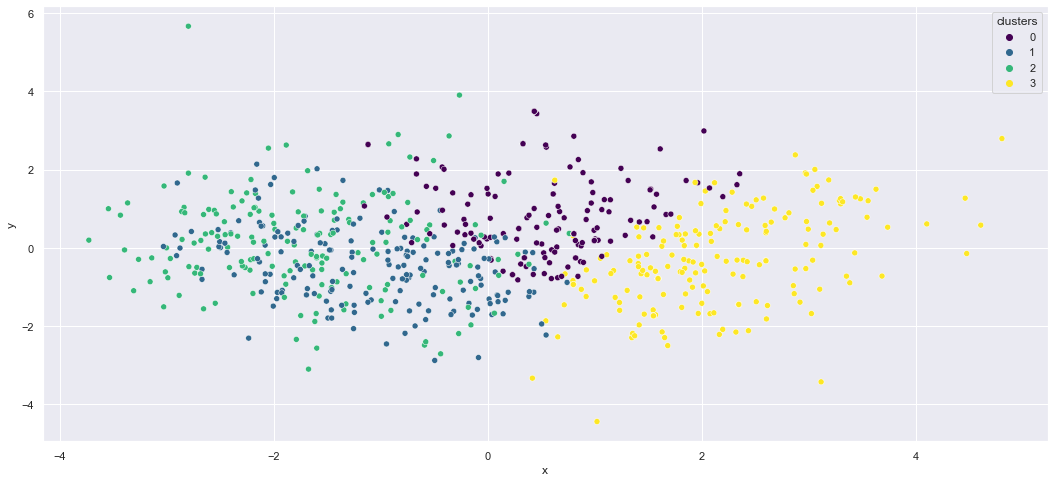

In [34]:
## Visualising clusters
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=pca, x='x', y='y', hue='clusters', palette='viridis')
plt.show()

## Cluster Profiling

In [35]:
df1=df.iloc[:, [3,5,6,7,8,9,10,11,12,13,14,15,16]]
df1['clusters']=df['clusters']
df1

,popularity,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,duration_ms,loudness,valence,mode,key,clusters
0,47,0.666,0.1940,124.159,0.0506,0.788,0.000000,0.534,215605,-4.644,0.564,1,0,1
1,48,0.447,0.1360,137.156,0.0413,0.964,0.002130,0.439,290400,-7.341,0.560,1,5,3
2,44,0.715,0.2250,135.000,0.0970,0.479,0.000633,0.525,295926,-7.658,0.961,1,6,1
3,44,0.468,0.1220,125.829,0.2400,0.127,0.000000,0.677,176019,-7.866,0.518,1,9,1
4,40,0.724,0.0888,100.051,0.0296,0.179,0.001230,0.772,214132,-6.986,0.713,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,45,0.903,0.0641,129.967,0.3070,0.155,0.000050,0.536,290493,-5.501,0.657,0,1,2
713,87,0.574,0.1000,94.009,0.0278,0.572,0.000000,0.577,268165,-6.525,0.436,1,0,0
714,74,0.736,0.1280,85.035,0.0658,0.643,0.000000,0.572,238252,-7.768,0.778,1,11,0
715,63,0.769,0.1590,158.953,0.0464,0.105,0.256000,0.687,149434,-5.604,0.413,0,11,2


### 1.) Cluster 1 (Beats+ Gloomy)

In [36]:
clust1=df1.loc[df1.clusters==0]
clust1[['popularity','energy','liveness','tempo','speechiness','acousticness','instrumentalness','danceability','duration_ms','loudness','valence','mode','key']].mean()

popularity              59.795181
energy                   0.452271
liveness                 0.121495
tempo                  104.934578
speechiness              0.046182
acousticness             0.594376
instrumentalness         0.004654
danceability             0.705934
duration_ms         221587.259036
loudness                -8.601410
valence                  0.534789
mode                     0.963855
key                      4.584337
dtype: float64

In [37]:
clust_1=df.loc[df.clusters==0]
clust_1[['song_name','artist']].tail(10)

,song_name,artist
668,Mila Hai Jabse Tu,Ashwin Adwani
669,Sarphira,Vasu Kainth
673,Shaayad,Taba Chake
678,That's Hilarious,Charlie Puth
682,Night Changes,One Direction
692,Girlfriend,Charlie Puth
702,Pancakes for Dinner,Lizzy McAlpine
705,Vitamin T,KERA
713,"Kesariya (From ""Brahmastra"")",Pritam
714,"Hum Nashe Mein Toh Nahin (From ""Bhool Bhulaiya...",Pritam


As per the features, cluster 1 contains songs with high danceability and neutral acoustics and energy.

### 2.) Cluster 2 (Beats + happy)

In [38]:
clust2=df1.loc[df1.clusters==1]
clust2[['popularity','energy','liveness','tempo','speechiness','acousticness','instrumentalness','danceability','duration_ms','loudness','valence','mode','key']].mean()

popularity              57.401099
energy                   0.705819
liveness                 0.160046
tempo                  126.198176
speechiness              0.071605
acousticness             0.188906
instrumentalness         0.002539
danceability             0.646714
duration_ms         235442.543956
loudness                -5.903440
valence                  0.540012
mode                     1.000000
key                      4.994505
dtype: float64

In [39]:
clust_2=df.loc[df.clusters==1]
clust_2[['song_name','artist']].tail(10)

,song_name,artist
679,Beautiful,Anne-Marie
680,Perfect,One Direction
681,Play Date,Melanie Martinez
685,Beautiful Life,Now United
688,Heart Attack,Demi Lovato
691,Jalebi Baby (Tesher x Jason Derulo),Tesher
694,positions,Ariana Grande
708,You Get Me Rockin & Reeling,Pritam
709,Desi Girl,Vishal-Shekhar
711,Love Mera Hit Hit,Pritam


As per the features, cluster 2 contains energetic, party songs with high beats, energy and danceability and very less acoustics and instrumentals. Moreover, these songs have happy lyrics.

### 3.) Cluster 3 (Beats + neutral)

In [40]:
clust3=df1.loc[df1.clusters==2]
clust3[['popularity','energy','liveness','tempo','speechiness','acousticness','instrumentalness','danceability','duration_ms','loudness','valence','mode','key']].mean()

popularity              58.463277
energy                   0.665379
liveness                 0.165463
tempo                  116.716746
speechiness              0.104737
acousticness             0.216597
instrumentalness         0.008406
danceability             0.682390
duration_ms         221495.971751
loudness                -6.390537
valence                  0.533135
mode                     0.022599
key                      6.062147
dtype: float64

In [41]:
clust_3=df.loc[df.clusters==2]
clust_3[['song_name','artist']].tail(10)

,song_name,artist
687,It's You,Ali Gatie
689,Hold On,Justin Bieber
690,"Alone, Pt. II",Alan Walker
693,Trampoline (with ZAYN),SHAED
706,Gallan Goodiyaan,Yashita Sharma
707,The Disco Song,Vishal-Shekhar
710,Twist,Neeraj Shridhar
712,Aahun Aahun,Master Saleem
715,Porkanda Singam EDM Version (Additional Song),Anirudh Ravichander
716,Vikram - Title Track,Anirudh Ravichander


Cluster 3 contains energetic songs with high beats, energy and less acoustics and instrumentals. Moreover, these songs have neutral lyrics. There is a very minor difference between Cluster 2 and 3, songs in cluster 2 are more acoustic.

### 4.) Cluster 4 (Acoustic + sad)

In [42]:
clust4=df1.loc[df1.clusters==3]
clust4[['popularity','energy','liveness','tempo','speechiness','acousticness','instrumentalness','danceability','duration_ms','loudness','valence','mode','key']].mean()

popularity              50.234375
energy                   0.372145
liveness                 0.136717
tempo                  110.607630
speechiness              0.041692
acousticness             0.693923
instrumentalness         0.058082
danceability             0.489901
duration_ms         260748.802083
loudness               -10.581302
valence                  0.299521
mode                     0.932292
key                      4.427083
dtype: float64

In [43]:
clust_4=df.loc[df.clusters==3]
clust_4[['song_name','artist']].tail(10)

,song_name,artist
672,Mere Meet,Vipin Singh
695,Sweet,Cigarettes After Sex
696,Cry,Cigarettes After Sex
697,K.,Cigarettes After Sex
698,Sunsetz,Cigarettes After Sex
699,Apocalypse,Cigarettes After Sex
700,Heavenly,Cigarettes After Sex
701,Keep on Loving You,Cigarettes After Sex
703,you ruined phoebe bridgers,Anya Gupta
704,Short and Sweet,Brittany Howard


As per the features, cluster 4 contains low energetic songs with fewer beats and more acoustics and instrumentals. Moreover, these songs have sad lyrics.

### Inferences

-- Songs with more beats and energy are more popular than acoustics songs.

-- Sad songs usually have a longer duration than other songs.

-- Songs with high beats and energy has more danceability.

-- I like listening to songs which are sad and more acoustic than songs with more energy and beats.